<a href="https://colab.research.google.com/github/Rushabhtikale92/Play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_by_Rushabh_Tikale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Working On Complex Thing....
 As we all know that to work with data is called as *Data Scientist* . 
    In this we have to deal with some complex data which is not possible for the men..But the machine can easily analyse it. So here the reason why human depends on machine.

Now lets get deep in our data and invite some library which will help us to work on data.

In [1]:
# Importing library :
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We speak on multi kaggle party but we did not the main moto without this we can't do anything actualy we are not prepare our datasets now we invite our data in this party..

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv')

# Lets Try To Summarize Information From Data

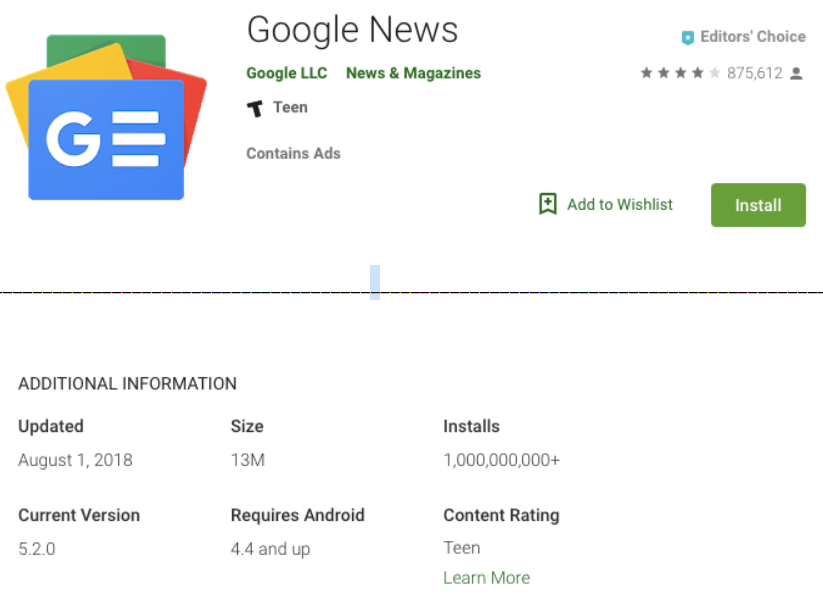

# Overiew Of Column :

In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

So before we going ahead we first remove duplicates if any have in the data.It's get us a small data..
so we complete our approach for remove some type of rows in data which extract us from identifying the proper data This proper data is helps to better work with data.As we moving on analysis data we want some clear data with sort and easy.

Now,its time to compete data into more clarification so we are not get daggled with heavy data..

A good proverb is 

*“Data are just summaries of thousands of stories – tell a few of those stories to help make the data meaningful.” — Chip & Dan Heath*

In [5]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [7]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

# Replacing NaN values:

1. why is it important for to replace NaN value?
 
 so the clear answer is that data contains some zero and non zero values which we have to neglect zero values because that data not give us a clear visualization that's why it is very useful for analysis of data.

 In short we can say we are neglecting unrelatable data for further process.

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


while checking with above data we are getting some features has missing value se we have to replace it with zero. It does not mean zero is the only value wecan replaced with we can change with any of value.

In [9]:
# Fill NaN value with zero.
data = data.fillna(0)

In [ ]:
# Rechecking the data is having null value.
total = data.isnull().sum().sum()
total

0

# Lets meet with Paid Apps :
 “Pay the price only once so you do not have to pay forever. Value is what we get when we pay the price only once.”    ― Alan Maiccon***

  The common psychhology of people is they  dont want most of things for free so we take out paid apps.          
       so we have to pay only once for the app and us it for lifetime.... 

In [ ]:
paid_apps = data[data['Type'] == 'Paid']
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


By diagnosing the data frame, we know that:

1.There are 13 columns of properties with 10841 rows of data.

2.Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'.

3.Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

4.Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

5.Values of column 'Price' are strings representing price with symbol '$'.
Hence, we will need to do some data cleaning.

# 💥 Lets Clean Dirty Data:💥

Cleaning Data is the most important concept to make the visualization beacause the data always be in numerical format it should not contain punctuation or any other like string.
Now when we wonder in data we found some tricky things that get us in trouble to work on it.So we just remove some unwanted things.
# ***Clean India beautiful india*** 
#       A reknown slog of india  we used here in the ways like:
#  ***Clean Data beautiful Data***  

  Lets clean data by the following :

**Reviews**:As we get to know there are some apps which are not get any reviews by the user so we replace with 0 and change data type to float..

**price**:In price '$'  is  not get me clear inclusion so we replaced it with space. 

**installs**:In installs '+' sign will replaced with ' '.

**Size**:In size 'M' and 'k' get me in trouble to get simple data 

In [10]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
data["Reviews"] = [float(str(i).replace("M", "")) for i in data["Reviews"]]
data['Reviews'] = data['Reviews'].astype(float)

In [11]:
# 2) clean the 'Installs' data and change the type 'object' to 'int'
data['Installs'] = data['Installs'].replace('[+,]','',regex = True)
data['Installs'] = pd.to_numeric(data['Installs'],errors = 'coerce').astype('float')


As when we geting deep into the size we found the some size of apps is varies with device So lets just straight and simple with it and our moto is all users must to acess that apps so we dont need to keep some restriction on it.we just remove this error that before downloading the user must get the size of apps.

In [12]:
# 3) clean the 'Size' data and change the type 'object' to 'float
data['Size'] = data['Size'].replace('[M]','',regex = True)
data['Size'] = data['Size'].replace('[Varies with device]','' ,regex = True)
data['Size'] = data['Size'].replace('[k]','' ,regex = True)
data['Size'] = pd.to_numeric(data['Size'],errors = 'coerce').astype('float')
data['Size'] = data['Size'].fillna(0)

In [13]:
# 4) clean the 'Price' data and change the type 'object' to 'float
data['Price'] = data['Price'].replace('[$]','',regex = True)
data['Price'] = data['Price'].replace('[Everyone]','',regex = True)
data['Price'] = pd.to_numeric(data['Price'],errors = 'coerce').astype('float')

In [14]:
# 5) clean the 'Rating' data and change the type 'object' to 'float
data['Rating'] = pd.to_numeric(data['Rating'],errors = 'coerce').astype('float')

* Droping some unrelatable dataset 

When we looking over the dataset the rating feature has some of the column have unexpectable value which distract the working of entire data. so we extract this type of features. 

In [15]:
# Extracting unrelatable features from rating.
data.drop(data[data['Rating'] > 5.0 ].index , inplace=True)
data.drop(data[data['Rating'] <= 0.0 ].index , inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   float64
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   float64
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


wow, finaly we get clear data after doing too much activity with data.For EDA we have to go through the more and more steps such as cleaning , replacing,etc.so now we move to the main moto of our project is EDA .

Now we will go with one by one for EDA of our project.It will make easy for us to visualize information from our data.So lets begin...

# Exploratory Data Analysis:

Text(0.5, 0, 'Division of app')

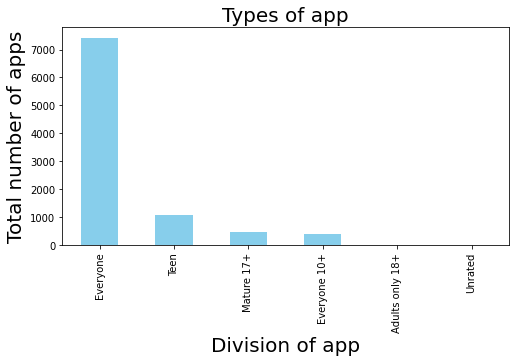

In [17]:
# Grab the zone of Rating:
Zone_of_rating = data['Content Rating'].value_counts()
plt.rcParams['figure.figsize'] = (8,4)
Zone_of_rating.plot(kind='bar',color='skyblue')
plt.title('Types of app',fontsize=20)
plt.ylabel('Total number of apps',fontsize=20)
plt.xlabel('Division of app',fontsize=20)

We know that some of the apps is not safe for children and teen .So according to division the apps are classified as above graph.This is very useful for keeping a loyality in global network

Text(0.5, 0, 'Number of Installs')

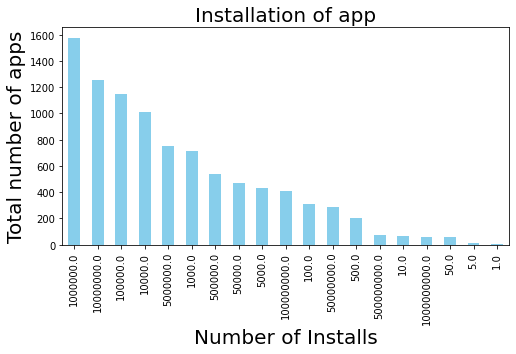

In [18]:
# Grab the Installing of Apps:
Zone_of_rating = data['Installs'].value_counts()
plt.rcParams['figure.figsize'] = (8,4)
Zone_of_rating.plot(kind='bar',color='skyblue')
plt.title('Installation of app',fontsize=20)
plt.ylabel('Total number of apps',fontsize=20)
plt.xlabel('Number of Installs',fontsize=20)

Text(0.5, 1.0, 'Number of apps for each category')

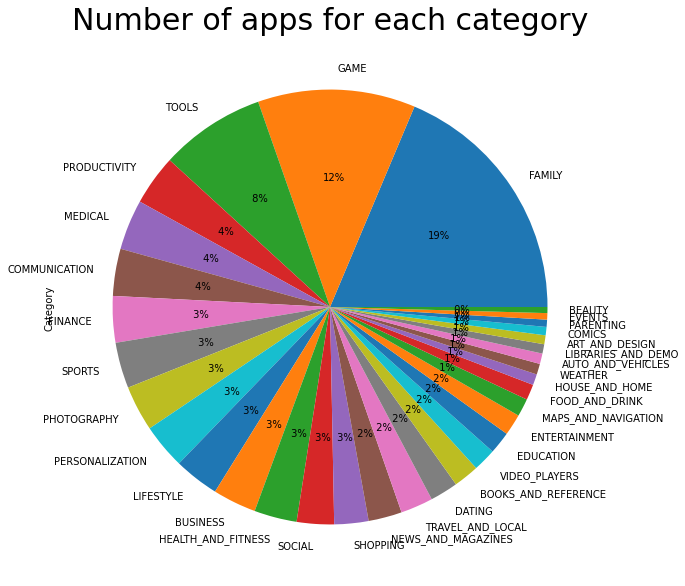

In [19]:
#Get the number of apps for each category.
Number_of_apps_each_category = data["Category"].value_counts()
plt.rcParams['figure.figsize'] = (20,10)
Number_of_apps_each_category.plot(kind='pie', y='points', autopct='%2.0f%%')
colors = ['red', 'pink', 'steelblue']
plt.title('Number of apps for each category',fontsize=30)

From this plotting we get to know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools... so mostly user want to do entertainment in their life. So that's the reason user preferd apps from this category.

Now we will see what will be the reviews for each category.So lets start...

# Reviews Per Category

Text(0.5, 0, 'Category')

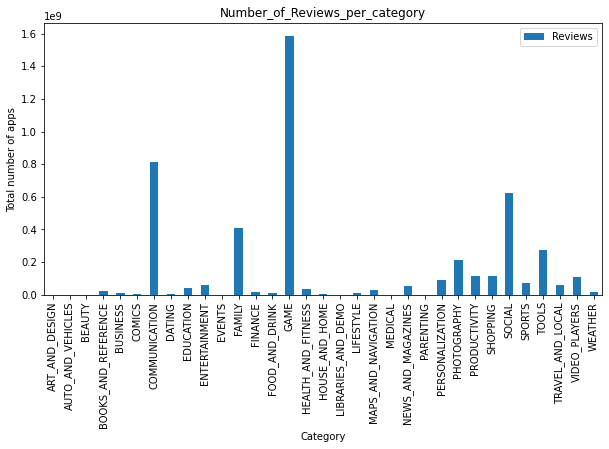

In [20]:
# visualize max reviews by category:
categories = data.groupby('Category')
category_installs_sum_data = categories[['Reviews']].sum()
plt.rcParams['figure.figsize'] = (10, 5)
category_installs_sum_data.plot(kind='bar')
plt.title('Number_of_Reviews_per_category')
plt.ylabel('Total number of apps')
plt.xlabel('Category')